# 0. What we expect
This is quite standard problem in Data Scientists work and we want to see how you think - what questions you ask and how do you go about answering them.

Approach this exercise as if this document will be later on read by someone, who doesn't understand data science. So please include as many comments as possible and keep your explanations clear and concise. Good luck!


### 1. Exploratory Data Analysis
A standard first step to establish baseline understanding of the data we have at hand.

### 2. Questions

Build hypothesis ($H_0$, $H_a$) to test whether:  
- Gender gave better chance of churn?
- Does having partner increase chances of churn?
- Does Payment Method increase the chances of churn? 
- Any other question that you think is interesting to answer?

### 3. Machine Learning Model

Pick and build machine learning model predicting Churn. In your own words explain how this model works and why did you choose it. Discuss its performance.

# 1. Introduction

This dataset contains telecomunications customers data: basic demographics and some information about services they purchased. TV companies, Telecomunications companies and internet providers often use customer attrition analysis as one of their key business metrics to retain customers, who might be cancelling services, in a cost efficient way. 

|**Variable**     |**Description**                                                                   |
|-----------------|----------------------------------------------------------------------------------|
|customerID       | Customer ID                                                                      |
|gender           | Whether the customer is a male or a female                                       |
|SeniorCitizen    | Whether the customer is a senior citizen or not (1, 0)                           |
|Partner          | Whether the customer has a partner or not (Yes, No)                              |
|Dependents       | Whether the customer has dependents or not (Yes, No)                             | 
|tenure           | Number of months the customer has stayed with the company                        | 
|PhoneService     | Whether the customer has a phone service or not (Yes, No)                        |
|MultipleLines    | Whether the customer has multiple lines or not (Yes, No, No phone service)       |
|InternetService  | Customer’s internet service provider (DSL, Fiber optic, No)                      |
|OnlineSecurity   | Whether the customer has online security or not (Yes, No, No internet service)   |
|OnlineBackup     | Whether the customer has online backup or not (Yes, No, No internet service)     |
|DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
|TechSupport      | Whether the customer has tech support or not (Yes, No, No internet service)      |
|StreamingTV      |  Whether the customer has streaming TV or not (Yes, No, No internet service)     |
|StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No internet service)  |
|Contract         | The contract term of the customer (Month-to-month, One year, Two year)           |
|PaperlessBilling | Whether the customer has paperless billing or not (Yes, No)                      |
|PaymentMethod    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
|MonthlyCharges   | The amount charged to the customer monthly                                       |
|TotalCharges     | The total amount charged to the customer                                         |
|Churn            | Whether the customer churned or not (Yes or No)                                  |



# 2. Your analysis

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency 
from scipy.stats import chi2
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  
warnings.simplefilter(action='ignore', category=FutureWarning)

In [155]:
churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 1. Exploratory Data Analysis

#### 1.1. Missing values


In [156]:
(churn_df.isnull()).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [157]:
churn_df = churn_df.replace(" ", np.nan)

In [158]:
(churn_df.isnull()).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [159]:
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace(np.nan, 0).astype('float32')

So there are missing values in the TotalCharges column. 
This values are actually a blank space in the csv file and are exclusive for customers with zero tenure.
From this it can be concluded that customers have not paid anything to the company, so these values are changed to zero.

#### 1.2. Target value

The whole analysis is focused on the churn variable. 
Later, machine learning methods will be used to predict the churn, so an explanotory analysis is all related to this variable as well. 

Churn: No - 5174 clients, 72.5%

Churn: Yes - 1869 clients, 27.5%

In [160]:
churn_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [161]:
(churn_df['Churn'].value_counts())*100/churn_df['Churn'].count()

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

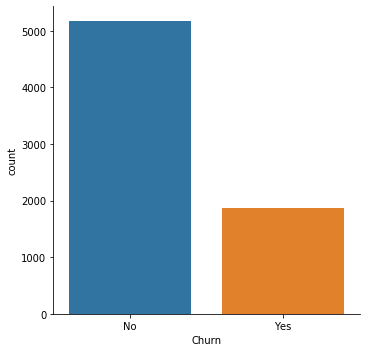

In [162]:
churn_val = sns.catplot(x = "Churn", kind = "count", data = churn_df)

Obviously, most customers did not churn, so we have a binary classification problem with a slightly unbalanced target.

#### 1.3. Numerical features

There are only three numerical columns: tenure, monthly charges and total charges. 
The following is a brief description of them.

In [163]:
churn_df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.732178
std,24.559481,30.090047,2266.794434
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.549988
50%,29.000000,70.350000,1394.550049
75%,55.000000,89.850000,3786.599976
max,72.000000,118.750000,8684.799805


 - Tenure ranges from 0 to 72, with an average of 32.37. 
 - MonthlyCharges ranges from 18.25 to 118.75, with an average of 64.76. 
 - TotalCharges ranges from 0 to 8684.8, with an average of 2279.73. 

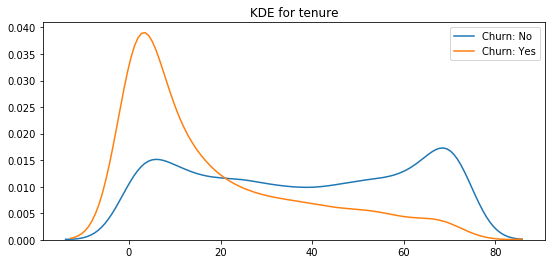

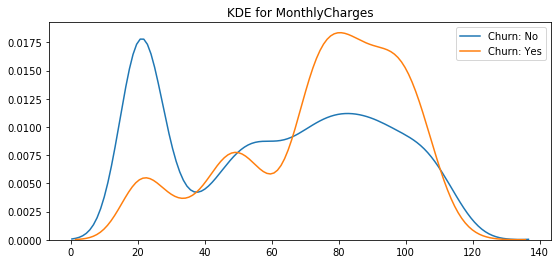

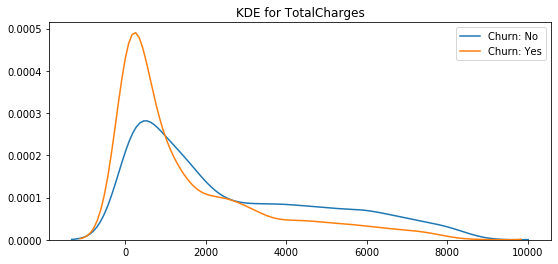

In [164]:
plt.figure(figsize=(9, 4))
plt.title("KDE for tenure")
ax0 = sns.kdeplot(churn_df[churn_df['Churn'] == 'No']['tenure'], label= 'Churn: No')
ax1 = sns.kdeplot(churn_df[churn_df['Churn'] == 'Yes']['tenure'], label= 'Churn: Yes')

plt.figure(figsize=(9, 4))
plt.title("KDE for MonthlyCharges")
ax0 = sns.kdeplot(churn_df[churn_df['Churn'] == 'No']['MonthlyCharges'], label= 'Churn: No')
ax1 = sns.kdeplot(churn_df[churn_df['Churn'] == 'Yes']['MonthlyCharges'], label= 'Churn: Yes')

plt.figure(figsize=(9, 4))
plt.title("KDE for TotalCharges")
ax0 = sns.kdeplot(churn_df[churn_df['Churn'] == 'No']['TotalCharges'], label= 'Churn: No')
ax1 = sns.kdeplot(churn_df[churn_df['Churn'] == 'Yes']['TotalCharges'], label= 'Churn: Yes')

From these plots we can say that:
 - Clients with smaller tenure are more likely to churn
 - Clients with higher MonthlyCharges are also more likely to churn
 - Variable TotalCargers does not provide additional information
 - Tenure and MonthlyCharges are probably important features

#### 1.3. Categorical features

Here we have 16 categorical features. 
 - 6 binary features (Yes/No) (gender, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling)
 - 9 features with three unique values each (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract)
 - One feature with four unique values (PaymentMethod)

#### 1.3.1. Binary features

[]

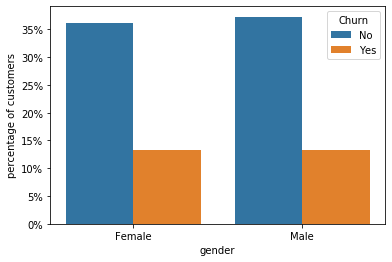

In [165]:
g = churn_df.groupby("gender")["Churn"].value_counts().to_frame()
g = g.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
g["percentage of customers"] = g["percentage of customers"]/len(churn_df)
ax = sns.barplot(x="gender", y= "percentage of customers", hue='Churn', data=g)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

 - Gender is not an indicative of churn.

[]

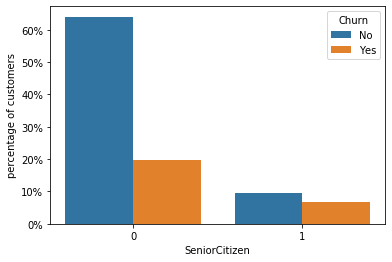

In [166]:
g = churn_df.groupby("SeniorCitizen")["Churn"].value_counts().to_frame()
g = g.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
g["percentage of customers"] = g["percentage of customers"]/len(churn_df)
ax = sns.barplot(x = "SeniorCitizen", y = "percentage of customers", hue='Churn', data=g)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

 - Respectively, senior citizen are more likely to chur

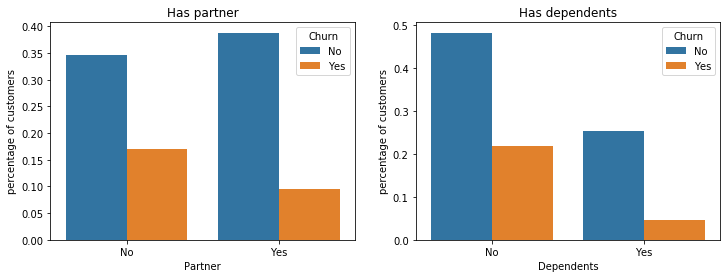

In [167]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
#--------------------
gp_partner = churn_df.groupby('Partner')["Churn"].value_counts()/len(churn_df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
#--------------------
gp_dep = churn_df.groupby('Dependents')["Churn"].value_counts()/len(churn_df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

 - Customers that doesn't have partners are more likely to churn
 - Customers without dependents are also more likely to churn

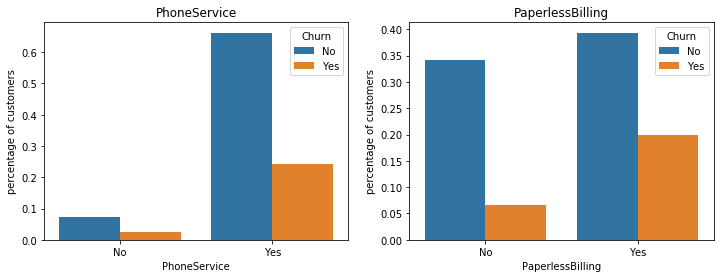

In [168]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("PhoneService")
axis[1].set_title("PaperlessBilling")
axis_y = "percentage of customers"
#--------------------
gp_partner = churn_df.groupby('PhoneService')["Churn"].value_counts()/len(churn_df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='PhoneService', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
#--------------------
gp_dep = churn_df.groupby('PaperlessBilling')["Churn"].value_counts()/len(churn_df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='PaperlessBilling', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

 - Customers with paperless billing are more probable to churn
 - There are no relevant information about the PhoneService feature as most customers have phone service

#### 1.3.2. Three categories features

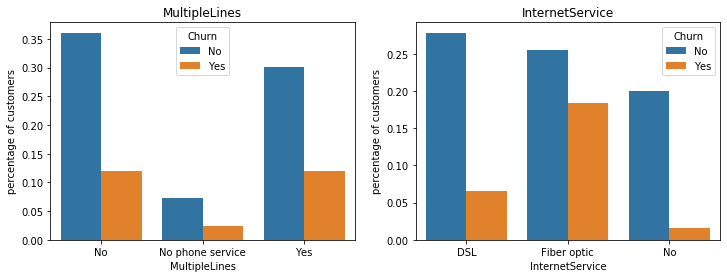

In [169]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("MultipleLines")
axis[1].set_title("InternetService")
axis_y = "percentage of customers"
#--------------------
gp_partner = churn_df.groupby('MultipleLines')["Churn"].value_counts()/len(churn_df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='MultipleLines', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
#--------------------
gp_dep = churn_df.groupby('InternetService')["Churn"].value_counts()/len(churn_df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='InternetService', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

 - Just few customers does not have phone service
 - There is no obvious difference between customers churn and multiple lines
 - Clients with Fiber optic are more likely to churn. 

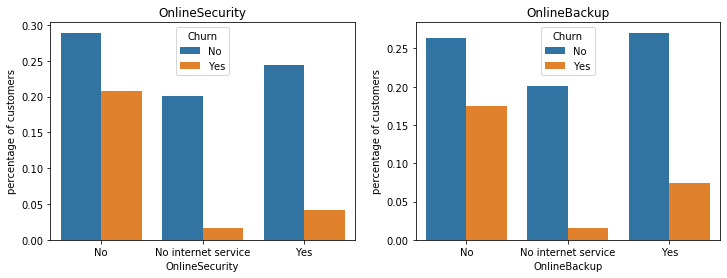

In [170]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("OnlineSecurity")
axis[1].set_title("OnlineBackup")
axis_y = "percentage of customers"
#--------------------
gp_partner = churn_df.groupby('OnlineSecurity')["Churn"].value_counts()/len(churn_df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='OnlineSecurity', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
#--------------------
gp_dep = churn_df.groupby('OnlineBackup')["Churn"].value_counts()/len(churn_df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='OnlineBackup', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

 - Customers not using OnlineSecurity are more likely to churn
 - Customers not using OnlineBackup are more likely to churn

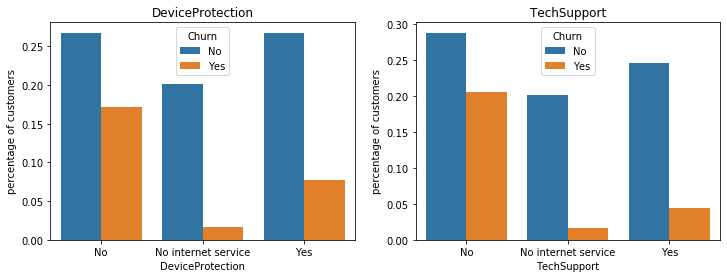

In [171]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("DeviceProtection")
axis[1].set_title("TechSupport")
axis_y = "percentage of customers"
#--------------------
gp_dep = churn_df.groupby('DeviceProtection')["Churn"].value_counts()/len(churn_df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='DeviceProtection', y= axis_y, hue='Churn', data=gp_dep, ax=axis[0])
#--------------------
gp_dep = churn_df.groupby('TechSupport')["Churn"].value_counts()/len(churn_df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='TechSupport', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

 - Customers not using DeviceProtection are more likely to churn
 - Customers not using TechSupport are more likely to churn

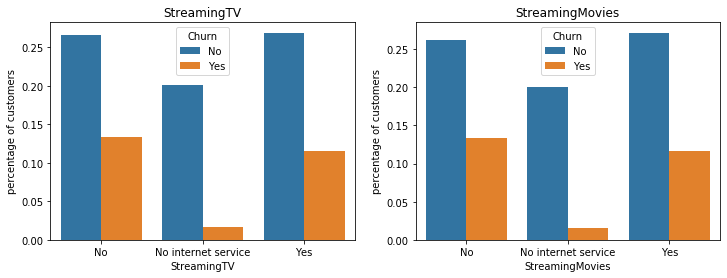

In [172]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("StreamingTV")
axis[1].set_title("StreamingMovies")
axis_y = "percentage of customers"
#--------------------
gp_dep = churn_df.groupby('StreamingTV')["Churn"].value_counts()/len(churn_df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='StreamingTV', y= axis_y, hue='Churn', data=gp_dep, ax=axis[0])
#--------------------
gp_dep = churn_df.groupby('StreamingMovies')["Churn"].value_counts()/len(churn_df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='StreamingMovies', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

 - Streaming service is not predictive for churn

[]

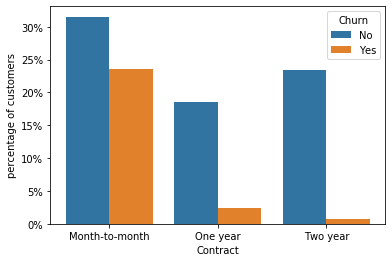

In [173]:
g = churn_df.groupby("Contract")["Churn"].value_counts().to_frame()
g = g.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
g["percentage of customers"] = g["percentage of customers"]/len(churn_df)
ax = sns.barplot(x = "Contract", y = "percentage of customers", hue='Churn', data=g)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

 - Clients with month-to-month contract are more likely to churn.

#### 1.3.3. Four categories feature

[]

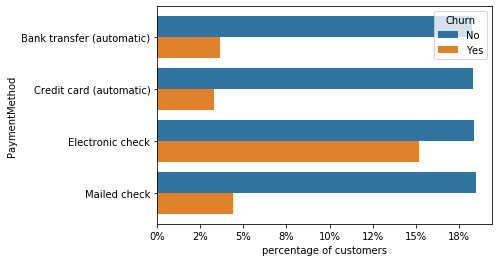

In [174]:
g = churn_df.groupby("PaymentMethod")["Churn"].value_counts().to_frame()
g = g.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
g["percentage of customers"] = g["percentage of customers"]/len(churn_df)
ax = sns.barplot(x = "percentage of customers", y = "PaymentMethod", hue='Churn', data=g, orient = 'h')
ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
ax.plot()

 - Electronic check payment method has a very high churn rate

#### 1.4. All variables


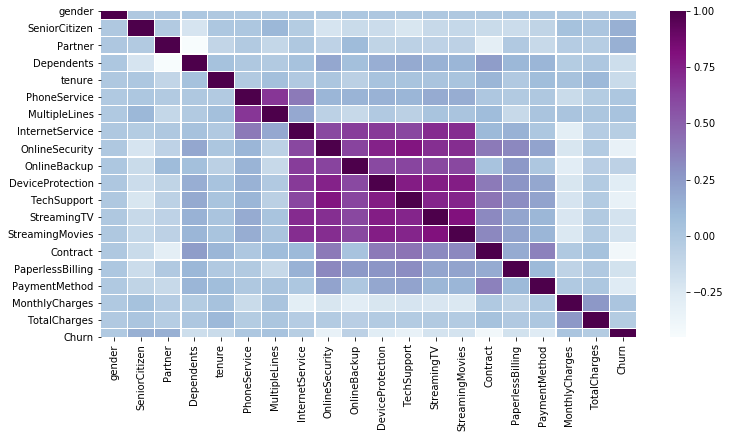

In [177]:
plt.figure(figsize=(12, 6))
churn_df.drop(['customerID'],axis=1, inplace=True)
corr = churn_df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="BuPu")

 - Correlation heatmap shows high correlation between PhoneService and MultipleLines. And between services: InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

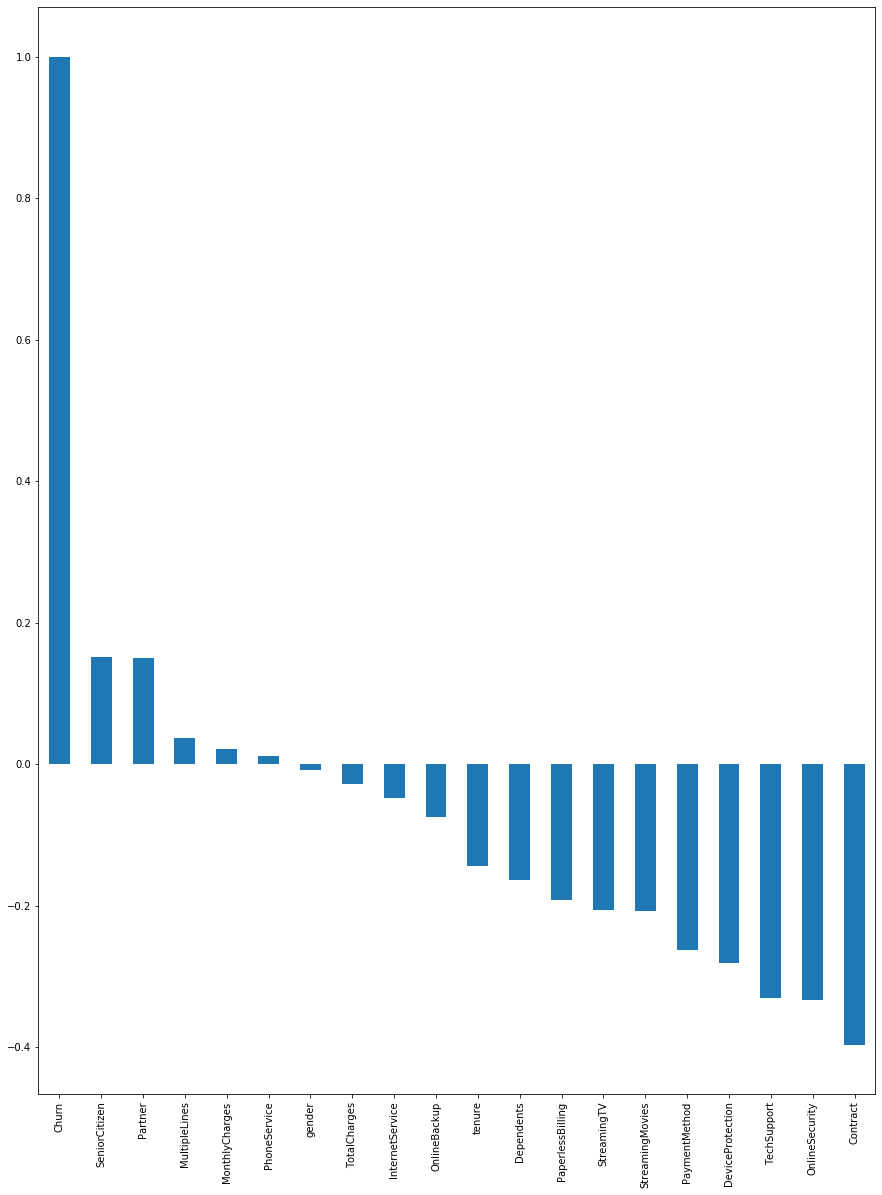

In [178]:
ch_df = churn_df.apply(lambda x: pd.factorize(x)[0])
plt.figure(figsize=(15,20))
ch_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

 - With churn the bigest and most significant correlation has Contract, then OnlineSecurity, TechSupport.

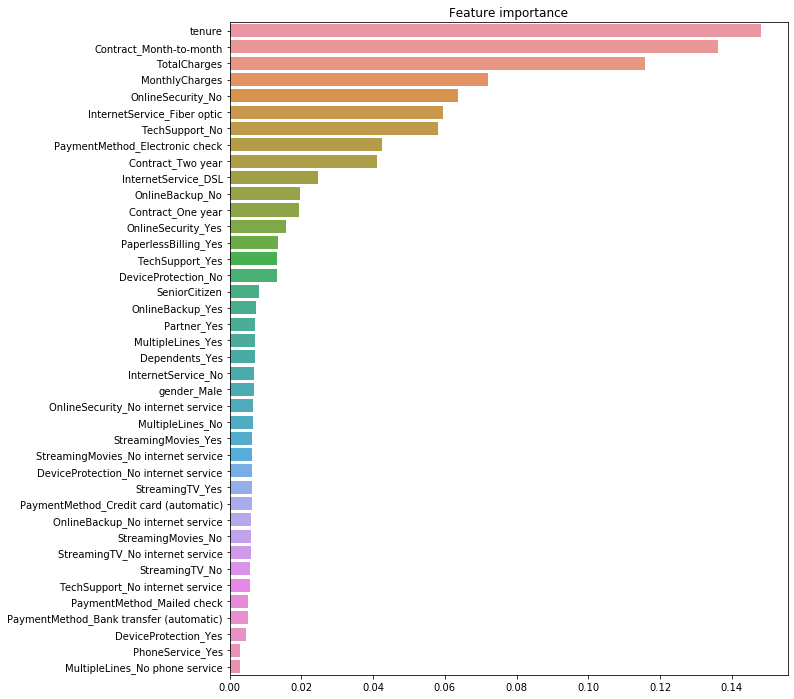

In [179]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(churn_df)
# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop,axis=1), df['Churn_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')

 - As we have seen from exploratory analysis, tenure, Contract - Month-to-month, MonnthlyCharges, OnlineSecurity - No, InternetService - Fiberoptic can be considered the most important variables in predicting chur.


### 2. Questions

Build hypothesis ($H_0$, $H_a$) to test whether:  
- Gender gave better chance of churn?
- Does having partner increase chances of churn?
- Does Payment Method increase the chances of churn? 

Testing hypothesis we assume that:
    $H_0$ indicates that featrure has no effect to the churn. 
    Alternative hypothesis $H_a$ indicates that feature has effect to the churn.
    
Since we have categorical variables, it is appropriate to use the chi-square test type.

In [180]:
hypoth = df[['gender_Female','Churn_Yes', 'Partner_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

In [181]:
def chi_sq(feature):
    contingency_table = pd.crosstab(hypoth[feature],hypoth["Churn_Yes"])
    #Observed Values
    Observed_Values = contingency_table.values 
    Expected_Values = b[3]
    no_of_rows = len(contingency_table.iloc[0:2,0])
    no_of_columns = len(contingency_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_columns-1)
    alpha = 0.05
    chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    critical_value = chi2.ppf(q=1-alpha,df=ddof)
    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=ddof)
    print('p-value:',p_value)
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',ddof)
    print('chi-square statistic:',chi_square_statistic)
    print('critical_value:',critical_value)

In [182]:
chi_sq("gender_Female")

p-value: 0.46983394114265187
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.522366503358827
critical_value: 3.841458820694124


Because p-value > 0.05, retain $H_0$,There is no relationship between churn and gender.

In [183]:
chi_sq("Partner_Yes")

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 163.44622977977352
critical_value: 3.841458820694124


Because p-value < 0.05, reject $H_0$,There is relationship between churn and partner. As we have seen in explanatory analysis, clients with no partner are more likely to churn.

In [184]:
chi_sq("PaymentMethod_Bank transfer (automatic)")

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 2213.5924858871304
critical_value: 3.841458820694124


In [185]:
chi_sq("PaymentMethod_Credit card (automatic)")

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 2281.461550733713
critical_value: 3.841458820694124


In [186]:
chi_sq("PaymentMethod_Electronic check")

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 1289.123530784262
critical_value: 3.841458820694124


In [187]:
chi_sq("PaymentMethod_Mailed check")

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 2040.7732753919254
critical_value: 3.841458820694124


Because all p-value < 0.05, reject $H_0$,There is relationship between PaymentMethod and churn. As we have seen in explanatory analysis, clients with PaymentMethod - Electronic are most likely to churn.

### 3. Machine Learning Model


In [188]:
df.drop(['Churn_No', 'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No'],axis=1, inplace=True)

All categorical values changed to dummy or binary, numerical variables must be standartized.

In [189]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[['tenure','MonthlyCharges', 'TotalCharges']].astype('float64')),columns=['tenure','MonthlyCharges', 'TotalCharges'])

In [190]:
df['tenure'] = df_std['tenure']
df['MonthlyCharges'] = df_std['MonthlyCharges']
df['TotalCharges'] = df_std['TotalCharges']

As usual, the data sample is shared by 80 percent to the train and 20 percent to test

In [191]:
Y = df["Churn_Yes"].values
X = df.drop(labels = ["Churn_Yes"],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [192]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [193]:
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7991483321504613


Even simple logistic regression has accuracy aroud of 0.79. 

In [194]:
randomForestModel = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 30)
randomForestModel.fit(X_train,y_train)
testPrediction =  randomForestModel.predict(X_test)
print(metrics.accuracy_score(y_test,testPrediction))

0.8026969481902059


In [195]:
print(confusion_matrix(y_test,testPrediction))

[[955  71]
 [207 176]]


The score of Random Forest Classifier show us that in 80% of the cases our model predicted the right outcome for our binary classification problem.

I have to admit that the machine learning models part and prediction of churn is not sufficiently developed in this task.

First, logistic regression can be used as the simplest classifier to test more complex methods. Random forest clasifier has been selected as one of the most commonly used methods for churn prediction. Both in various literature and in practical applications, this model demonstrates excellent churn classification. 

The next steps in improving the churn prediction model would be to find the most important variables, to drop variables that are strongly correlated with each other. The best performing hyper parameters should also be selected. More metrics to check model performance are also necessary. Also test and compare other models such as Nearest Neighbors Classifier and svm.
